In [1]:
'''
matrices de 5x5 para codificar letras
130filas, 5 columnas
es decir, letras apiladas

para visualizar, vamos a armar un tensor de 26*5*5

para entrenar la red neuronal, vamos a usar matriz de 26*25 ya que cada vector que le demos sera de
5*5

Para pasar los datos a biposlares, multiplicamos la matriz*2 y le restamos 1

La gracia es usar una codificacion para el target, basada en tener 5 neuronas de salida, y usar la codificacion ultios 5 bits, en binario
'''

'\nmatrices de 5x5 para codificar letras\n130filas, 5 columnas\nes decir, letras apiladas\n\npara visualizar, vamos a armar un tensor de 26*5*5\n\npara entrenar la red neuronal, vamos a usar matriz de 26*25 ya que cada vector que le demos sera de\n5*5\n\nPara pasar los datos a biposlares, multiplicamos la matriz*2 y le restamos 1\n\nLa gracia es usar una codificacion para el target, basada en tener 5 neuronas de salida, y usar la codificacion ultios 5 bits, en binario\n'

In [2]:
import numpy as np

from matplotlib import pyplot as plt

from google.colab import drive
drive.mount('/content/drive')

letras = np.loadtxt("/content/drive/MyDrive/Colab Notebooks/letras.txt")
letras.shape

Mounted at /content/drive


(130, 5)

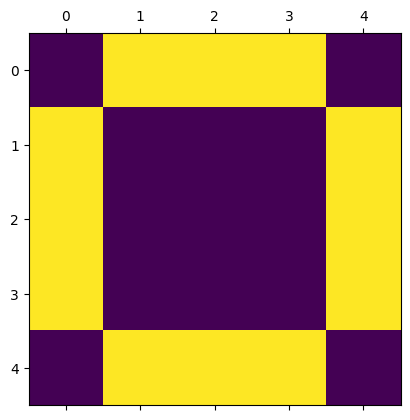

In [3]:
L = letras.reshape((26,5,5))
plt.matshow( L[14])#la O

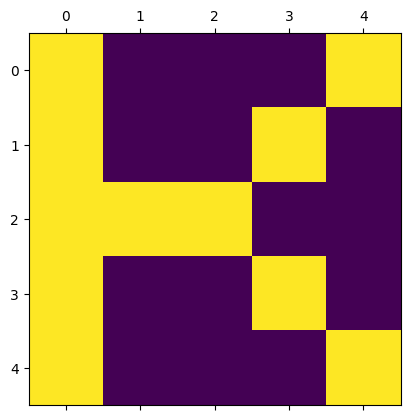

In [4]:
plt.matshow(L[10])#la k

In [5]:
#ahora vamos a convertir los datos al formato 26*25, y vamos a pasarlo a bipolar

x = letras.reshape((26,25))*2-1
x[:5]#esto muestra las primeras 5 letras, porque cada fila ES una letra

array([[-1., -1.,  1., -1., -1., -1.,  1., -1.,  1., -1.,  1.,  1.,  1.,
         1.,  1.,  1., -1., -1., -1.,  1.,  1., -1., -1., -1.,  1.],
       [ 1.,  1.,  1., -1., -1.,  1., -1., -1.,  1., -1.,  1.,  1.,  1.,
         1., -1.,  1., -1., -1., -1.,  1.,  1.,  1.,  1.,  1., -1.],
       [-1.,  1.,  1.,  1., -1.,  1., -1., -1., -1.,  1.,  1., -1., -1.,
        -1., -1.,  1., -1., -1., -1.,  1., -1.,  1.,  1.,  1., -1.],
       [ 1.,  1.,  1., -1., -1.,  1., -1., -1.,  1., -1.,  1., -1., -1.,
        -1.,  1.,  1., -1., -1., -1.,  1.,  1.,  1.,  1.,  1., -1.],
       [ 1.,  1.,  1.,  1.,  1.,  1., -1., -1., -1., -1.,  1.,  1.,  1.,
         1., -1.,  1., -1., -1., -1., -1.,  1.,  1.,  1.,  1.,  1.]])

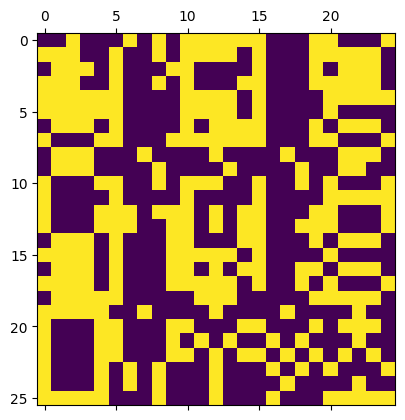

In [6]:
from matplotlib import pyplot as plt

plt.matshow(x)
#cada fila es una letra, porque linealizo cada letra, en esta matriz
#de forma bipolar

In [7]:
#aca vamos a armar la matriz target de las letras
import string
alfa = list(string.ascii_uppercase)
print(alfa)

['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']


In [8]:
print(len(alfa))

26


In [9]:
#prueba

print(bin(ord('B'))[-5:], '\n' , bin(ord('Z'))[-5:], '\n' ,type(bin(ord('Z'))[-5:]))

00010 
 11010 
 <class 'str'>


In [10]:
#pruebo el numerito en binario
print([int(x) for x in bin(ord('A'))[-5:]] , '\n' , type([int(x) for x in bin(ord('A'))[-5:]]))

[0, 0, 0, 0, 1] 
 <class 'list'>


In [11]:
target = np.zeros((26 , 5))

for fila in range(0 , len(alfa)):
  for col in range(0 , 5):
    target[fila,col] = int(([int(x) for x in bin(ord(alfa[fila]))[-5:]])[col])
  
print(target)

[[0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 1.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 1.]
 [0. 0. 1. 1. 0.]
 [0. 0. 1. 1. 1.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 1.]
 [0. 1. 0. 1. 0.]
 [0. 1. 0. 1. 1.]
 [0. 1. 1. 0. 0.]
 [0. 1. 1. 0. 1.]
 [0. 1. 1. 1. 0.]
 [0. 1. 1. 1. 1.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 1.]
 [1. 0. 0. 1. 0.]
 [1. 0. 0. 1. 1.]
 [1. 0. 1. 0. 0.]
 [1. 0. 1. 0. 1.]
 [1. 0. 1. 1. 0.]
 [1. 0. 1. 1. 1.]
 [1. 1. 0. 0. 0.]
 [1. 1. 0. 0. 1.]
 [1. 1. 0. 1. 0.]]


In [12]:
#otra pueba

print(target[1,:] , '\n' , target[25,:] , '\n' , target.shape)

[0. 0. 0. 1. 0.] 
 [1. 1. 0. 1. 0.] 
 (26, 5)


In [13]:
#para que los elementos de target sean int

target_int = np.int64(target)

print(type(target[0,0]) , '\n' , type(target_int[0,0]))

<class 'numpy.float64'> 
 <class 'numpy.int64'>


In [14]:
#los datos iniciales los pasamos a bipolares, asi que vamos a pasar a bipolar la matriz target

for fila in range(0,target_int.shape[0]):

  for col in range(0,target_int.shape[1]):

    if(target_int[fila,col]==0):

      target_int[fila,col] = int(-1)

print(target_int)

[[-1 -1 -1 -1  1]
 [-1 -1 -1  1 -1]
 [-1 -1 -1  1  1]
 [-1 -1  1 -1 -1]
 [-1 -1  1 -1  1]
 [-1 -1  1  1 -1]
 [-1 -1  1  1  1]
 [-1  1 -1 -1 -1]
 [-1  1 -1 -1  1]
 [-1  1 -1  1 -1]
 [-1  1 -1  1  1]
 [-1  1  1 -1 -1]
 [-1  1  1 -1  1]
 [-1  1  1  1 -1]
 [-1  1  1  1  1]
 [ 1 -1 -1 -1 -1]
 [ 1 -1 -1 -1  1]
 [ 1 -1 -1  1 -1]
 [ 1 -1 -1  1  1]
 [ 1 -1  1 -1 -1]
 [ 1 -1  1 -1  1]
 [ 1 -1  1  1 -1]
 [ 1 -1  1  1  1]
 [ 1  1 -1 -1 -1]
 [ 1  1 -1 -1  1]
 [ 1  1 -1  1 -1]]


In [15]:
np.ones(26).reshape(-1,1).shape

(26, 1)

In [16]:
#antes de arrancar el modelo hay que agregarle el bias a x

x_input_bias = np.concatenate((x,np.ones(26).reshape(-1,1)) , axis=1)

print(x.shape, '\n' ,x_input_bias.shape , '\n' , x_input_bias)

(26, 25) 
 (26, 26) 
 [[-1. -1.  1. -1. -1. -1.  1. -1.  1. -1.  1.  1.  1.  1.  1.  1. -1. -1.
  -1.  1.  1. -1. -1. -1.  1.  1.]
 [ 1.  1.  1. -1. -1.  1. -1. -1.  1. -1.  1.  1.  1.  1. -1.  1. -1. -1.
  -1.  1.  1.  1.  1.  1. -1.  1.]
 [-1.  1.  1.  1. -1.  1. -1. -1. -1.  1.  1. -1. -1. -1. -1.  1. -1. -1.
  -1.  1. -1.  1.  1.  1. -1.  1.]
 [ 1.  1.  1. -1. -1.  1. -1. -1.  1. -1.  1. -1. -1. -1.  1.  1. -1. -1.
  -1.  1.  1.  1.  1.  1. -1.  1.]
 [ 1.  1.  1.  1.  1.  1. -1. -1. -1. -1.  1.  1.  1.  1. -1.  1. -1. -1.
  -1. -1.  1.  1.  1.  1.  1.  1.]
 [ 1.  1.  1.  1.  1.  1. -1. -1. -1. -1.  1.  1.  1.  1. -1.  1. -1. -1.
  -1. -1.  1. -1. -1. -1. -1.  1.]
 [-1.  1.  1.  1. -1.  1. -1. -1. -1. -1.  1. -1.  1.  1.  1.  1. -1. -1.
  -1.  1. -1.  1.  1.  1. -1.  1.]
 [ 1. -1. -1. -1.  1.  1. -1. -1. -1.  1.  1.  1.  1.  1.  1.  1. -1. -1.
  -1.  1.  1. -1. -1. -1.  1.  1.]
 [-1.  1.  1.  1. -1. -1. -1.  1. -1. -1. -1. -1.  1. -1. -1. -1. -1.  1.
  -1. -1. -1.  1.  1.  1. -1.  1

36.35518815678806
23.79251594397681
18.412793483960805
15.33851214047691
13.315572928708036
11.868745747479107
10.77364419214209
9.909267962071402
9.204415370331459
8.614478386385438
8.110133382071606
7.671347318605176
7.2839930802582336
6.937838822314623
6.625302332118221
6.340651463364871
6.0794751305487456
5.838324101827901
5.614461560698697
5.405686484272888
5.210206424046439
5.026544469545501
4.853470276727074
4.689948299841287
4.535098491755036
4.388166153852292
4.248498576599874
4.115526772971565
3.988751068682477
3.8677296398450274
3.752069322436969
3.641418187066569
3.535459496034352
3.4339067507405914
3.336499605184108
3.243000472040575
3.1531916861353695
3.0668731192880943
2.9838601628490387
2.903982011481036
2.8270801951171967
2.753007316471901
2.681625959689105
2.6128077421949096
2.546432486970316
2.482387496570417
2.420566913514151
2.36087115432707
2.3032064066721922
2.247484180755235
2.193620907620369
2.1415375781262034
2.0911594173572583
2.0424155900249295
1.99523893307

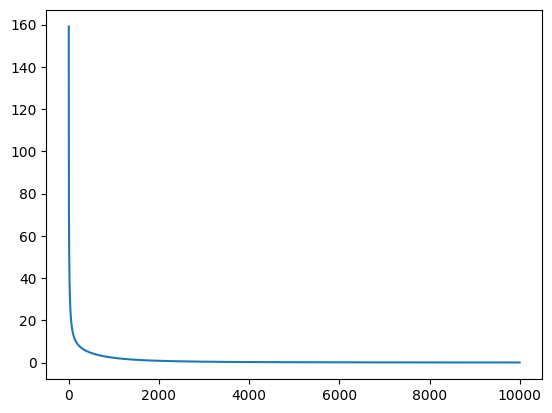

In [17]:
#ahora que el target quedo en enteros, podemos entrenar el modelo.

#perceptron simple, para aprender las letras...

#para la funcion de slaida, uso tanh

P = 26#num de letras que le voy a enseniar(filas del input)

N = 25#num de columnas del input(seria como las variables de entrada)

M = 5#las columnas del target(serian las variables de salida)

#generemos los w al azar

w = np.random.normal(0,0.1,(N+1,M))

#el ciclo, para el perceptron...

#hasta aca, son los pasos sucesivos, pra calcular el error, usemos estos en un ciclo
epoca = 0
error_tanh = 10000
errores_tanh = []
while(error_tanh > 0.001 and epoca < 10000):
    
    y = np.tanh(np.dot(x_input_bias,w))
    
    dist = target_int - y
    
    delta_w = np.dot(x_input_bias.T,dist)
    
    w = w + delta_w*0.01
    
    error_tanh = np.sum(np.square(dist))
    
    errores_tanh.append(error_tanh)
    
    epoca+=1
    
    if(epoca%20==0):
    
        print(error_tanh)

print(y)

#vale la pena graficar los errores
x_errores_tanh = np.arange(0,len(errores_tanh))

plt.plot(x_errores_tanh , errores_tanh)

137.4984272780646
125.03037707763029
115.72894807955839
108.62827332326685
103.0516090448443
98.54487493843797
94.80494849355969
91.627361988037
88.87188479490439
86.44052580925083
84.2634856247411
82.29009352200521
80.48287854997413
78.81363245047153
77.26075507799594
75.80743686732997
74.44039523521174
73.14898277169507
71.92454856524701
70.75997435837021
69.64933316535937
68.587634849296
67.57063425977081
66.59468493856005
65.65662640441985
64.75369645351867
63.883462286866
63.043765942981516
62.232680697845055
61.44847594427802
60.68958867980109
59.95460018407584
59.242216801357266
58.55125399275166
57.88062301057104
57.22931968911483
56.59641495457319
55.9810467399727
55.382413055407056
54.79976601380882
54.23240665162678
53.67968041452522
53.140973202528585
52.61570788834777
52.10334123804369
51.60336117555531
51.11528434259121
50.63865391345949
50.173037630979245
49.718026034984575
49.27323085933702
48.83828357699261
48.4128340756755
47.99654944920829
47.58911289163508
47.190222

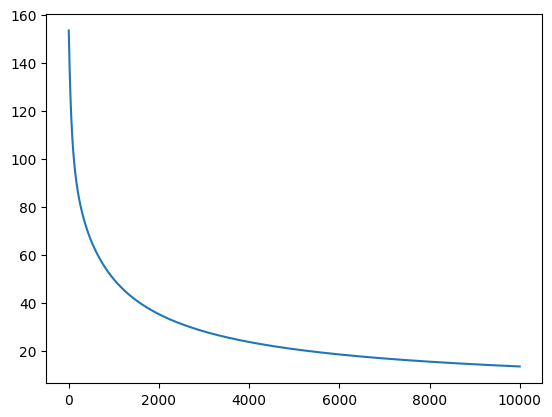

In [18]:
#voy a probar lo mismo ocn un learning rate mas chico

#ahora que el target quedo en enteros, podemos entrenar el modelo.

#perceptron simple, para aprender las letras...

#para la funcion de slaida, uso tanh

P = 26#num de letras que le voy a enseniar(filas del input)

N = 25#num de columnas del input(seria como las variables de entrada)

M = 5#las columnas del target(serian las variables de salida)

#generemos los w al azar

w = np.random.normal(0,0.1,(N+1,M))

#el ciclo, para el perceptron...

#hasta aca, son los pasos sucesivos, pra calcular el error, usemos estos en un ciclo
epoca = 0
error_tanh = 10000
errores_tanh = []
while(error_tanh > 0.001 and epoca < 10000):
    
    y = np.tanh(np.dot(x_input_bias,w))
    
    dist = target_int - y
    
    delta_w = np.dot(x_input_bias.T,dist)
    
    w = w + delta_w*0.0001
    
    error_tanh = np.sum(np.square(dist))
    
    errores_tanh.append(error_tanh)
    
    epoca+=1
    
    if(epoca%20==0):
    
        print(error_tanh)

print(y)

#vale la pena graficar los errores
x_errores_tanh = np.arange(0,len(errores_tanh))

plt.plot(x_errores_tanh , errores_tanh)

In [19]:
'''
Falta entrenar con una sign como func de salida

Falta entrenar con un patron ruidoso, aka que cada valor numerico de la fila input valga 0 o 1 + algun error
'''

'\nFalta entrenar con una sign como func de salida\n\nFalta entrenar con un patron ruidoso, aka que cada valor numerico de la fila input valga 0 o 1 + algun error\n'

244.0
236.0
236.0
216.0
192.0
156.0
132.0
132.0
120.0
132.0
104.0
124.0
104.0
68.0
60.0
64.0
60.0
48.0
48.0
40.0
36.0
36.0
44.0
40.0
40.0
36.0
16.0
16.0
24.0
20.0
16.0
8.0
20.0
[[-1. -1. -1. -1.  1.]
 [-1. -1. -1.  1. -1.]
 [-1. -1. -1.  1.  1.]
 [-1. -1.  1. -1. -1.]
 [-1. -1.  1. -1.  1.]
 [-1. -1.  1.  1. -1.]
 [-1. -1.  1.  1.  1.]
 [-1.  1. -1. -1. -1.]
 [-1.  1. -1. -1.  1.]
 [-1.  1. -1.  1. -1.]
 [-1.  1. -1.  1.  1.]
 [-1.  1.  1. -1. -1.]
 [-1.  1.  1. -1.  1.]
 [-1.  1.  1.  1. -1.]
 [-1.  1.  1.  1.  1.]
 [ 1. -1. -1. -1. -1.]
 [ 1. -1. -1. -1.  1.]
 [ 1. -1. -1.  1. -1.]
 [ 1. -1. -1.  1.  1.]
 [ 1. -1.  1. -1. -1.]
 [ 1. -1.  1. -1.  1.]
 [ 1. -1.  1.  1. -1.]
 [ 1. -1.  1.  1.  1.]
 [ 1.  1. -1. -1. -1.]
 [ 1.  1. -1. -1.  1.]
 [ 1.  1. -1.  1. -1.]]


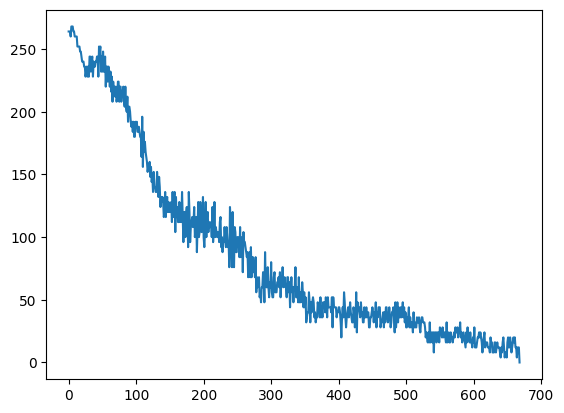

In [20]:
#vamos con entrenarla con func sign

#para la funcion de slaida, uso tanh

P = 26#num de letras que le voy a enseniar(filas del input)

N = 25#num de columnas del input(seria como las variables de entrada)

M = 5#las columnas del target(serian las variables de salida)

#generemos los w al azar

w = np.random.normal(0,0.1,(N+1,M))

#el ciclo, para el perceptron...

#hasta aca, son los pasos sucesivos, pra calcular el error, usemos estos en un ciclo
epoca = 0
error_sign = 10000
errores_sign = []
while(error_sign > 0.001 and epoca < 10000):
    
    y = np.sign(np.dot(x_input_bias,w))
    
    dist = target_int - y
    
    delta_w = np.dot(x_input_bias.T,dist)
    
    w = w + delta_w*0.0001
    
    error_sign = np.sum(np.square(dist))
    
    errores_sign.append(error_sign)
    
    epoca+=1
    
    if(epoca%20==0):
    
        print(error_sign)

print(y)

#vale la pena graficar los errores
x_errores_sign = np.arange(0,len(errores_sign))

plt.plot(x_errores_sign , errores_sign)

100.0
72.0
40.0
32.0
16.0
12.0
16.0
28.0
24.0
16.0
16.0
24.0
12.0
20.0
16.0
[[-1. -1. -1. -1.  1.]
 [-1. -1. -1.  1. -1.]
 [-1. -1. -1.  1.  1.]
 [-1. -1.  1. -1. -1.]
 [-1. -1.  1. -1.  1.]
 [-1. -1.  1.  1. -1.]
 [-1. -1.  1.  1.  1.]
 [-1.  1. -1. -1. -1.]
 [-1.  1. -1. -1.  1.]
 [-1.  1. -1.  1. -1.]
 [-1.  1. -1.  1.  1.]
 [-1.  1.  1. -1. -1.]
 [-1.  1.  1. -1.  1.]
 [-1.  1.  1.  1. -1.]
 [-1.  1.  1.  1.  1.]
 [ 1. -1. -1. -1. -1.]
 [ 1. -1. -1. -1.  1.]
 [ 1. -1. -1.  1. -1.]
 [ 1. -1. -1.  1.  1.]
 [ 1. -1.  1. -1. -1.]
 [ 1. -1.  1. -1.  1.]
 [ 1. -1.  1.  1. -1.]
 [ 1. -1.  1.  1.  1.]
 [ 1.  1. -1. -1. -1.]
 [ 1.  1. -1. -1.  1.]
 [ 1.  1. -1.  1. -1.]]


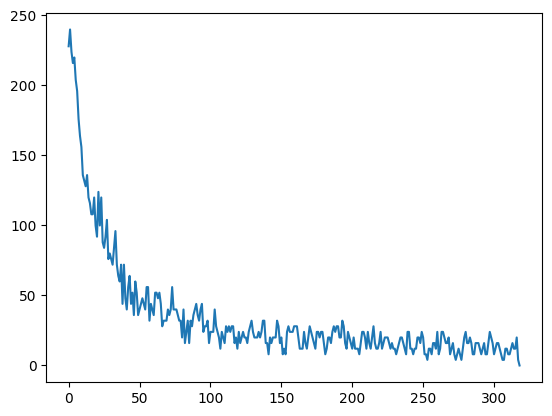

In [21]:
#vamos con entrenarla con func sign

#para la funcion de slaida, uso tanh

P = 26#num de letras que le voy a enseniar(filas del input)

N = 25#num de columnas del input(seria como las variables de entrada)

M = 5#las columnas del target(serian las variables de salida)

#generemos los w al azar

w = np.random.normal(0,0.1,(N+1,M))

#el ciclo, para el perceptron...

#hasta aca, son los pasos sucesivos, pra calcular el error, usemos estos en un ciclo
epoca = 0
error_sign = 10000
errores_sign = []

lr = 0.001
while(error_sign > 0.001 and epoca < 10000):
    
    y = np.sign(np.dot(x_input_bias,w))
    
    dist = target_int - y
    
    delta_w = np.dot(x_input_bias.T,dist)
    
    w = w + delta_w*lr
    
    error_sign = np.sum(np.square(dist))
    
    errores_sign.append(error_sign)
    
    epoca+=1
    
    if(epoca%20==0):
    
        print(error_sign)

print(y)

#vale la pena graficar los errores
x_errores_sign = np.arange(0,len(errores_sign))

plt.plot(x_errores_sign , errores_sign)

Se viene la musica, la cosa va con RUIDO!!!!!!

In [22]:
print(x_input_bias.shape)

(26, 26)


In [25]:
#pruebo el temira de las random normal media 0, desvio 0.1

np.random.normal(0 , 0.1)

0.032663079171976556

In [23]:
for i in range(0 , x_input_bias.shape[0]):

  for j in range(0 , (x_input_bias.shape[1]-1)):

    if(x_input_bias[i,j]==1):

      x_input_bias[i,j] = 1 + np.random.normal(0 , 0.1)

    if(x_input_bias[i,j]==-1):

      x_input_bias[i,j] = ((-1) + np.random.normal(0 , 0.1))

print(x_input_bias)

[[-0.6954107  -1.00663229  0.98169879 -1.06923442 -1.16143121 -0.90785065
   1.04712832 -0.98100528  0.8441081  -1.00341539  1.05958573  1.05369727
   1.03880621  0.986344    1.09907973  0.93516141 -1.12192761 -1.1310468
  -1.03494456  0.88698212  0.86821052 -0.96167515 -1.08543862 -1.03254084
   1.14104577  1.        ]
 [ 0.88660847  1.16509933  0.98075848 -0.88943191 -1.03683644  0.72139306
  -0.99945043 -1.13084088  1.12771    -1.10091517  1.01756051  1.12628262
   0.88460391  0.97777436 -0.98724586  1.17499234 -0.97892478 -0.93010465
  -1.06148225  1.10433905  0.97884649  0.90955117  0.90343359  1.00195067
  -1.11302774  1.        ]
 [-1.19860315  1.14704857  1.10607707  1.03675486 -0.97356206  0.95827068
  -0.96944862 -1.01338583 -1.04377025  0.96659265  0.95050293 -0.92789709
  -1.03761195 -1.03542247 -0.97175866  0.95352788 -1.14196486 -0.9862523
  -1.05288201  0.95421407 -1.05950014  0.98673475  1.064121    1.06986288
  -0.92857859  1.        ]
 [ 0.89922692  0.94863924  0.9235

128.0
60.0
24.0
8.0
[[-1. -1. -1. -1.  1.]
 [-1. -1. -1.  1. -1.]
 [-1. -1. -1.  1.  1.]
 [-1. -1.  1. -1. -1.]
 [-1. -1.  1. -1.  1.]
 [-1. -1.  1.  1. -1.]
 [-1. -1.  1.  1.  1.]
 [-1.  1. -1. -1. -1.]
 [-1.  1. -1. -1.  1.]
 [-1.  1. -1.  1. -1.]
 [-1.  1. -1.  1.  1.]
 [-1.  1.  1. -1. -1.]
 [-1.  1.  1. -1.  1.]
 [-1.  1.  1.  1. -1.]
 [-1.  1.  1.  1.  1.]
 [ 1. -1. -1. -1. -1.]
 [ 1. -1. -1. -1.  1.]
 [ 1. -1. -1.  1. -1.]
 [ 1. -1. -1.  1.  1.]
 [ 1. -1.  1. -1. -1.]
 [ 1. -1.  1. -1.  1.]
 [ 1. -1.  1.  1. -1.]
 [ 1. -1.  1.  1.  1.]
 [ 1.  1. -1. -1. -1.]
 [ 1.  1. -1. -1.  1.]
 [ 1.  1. -1.  1. -1.]]


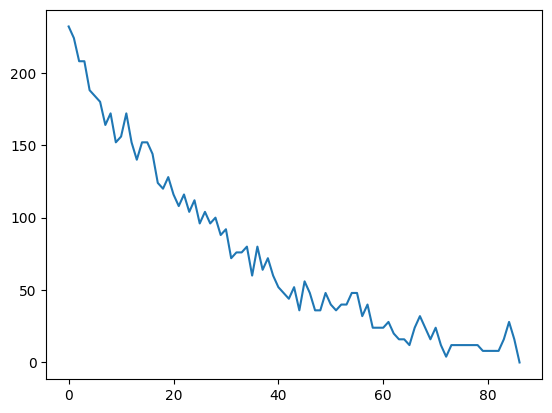

In [26]:
#probemos ahora que funcione la red

#vamos con entrenarla con func sign

#para la funcion de slaida, uso tanh

P = 26#num de letras que le voy a enseniar(filas del input)

N = 25#num de columnas del input(seria como las variables de entrada)

M = 5#las columnas del target(serian las variables de salida)

#generemos los w al azar

w = np.random.normal(0,0.1,(N+1,M))

#el ciclo, para el perceptron...

#hasta aca, son los pasos sucesivos, pra calcular el error, usemos estos en un ciclo
epoca = 0
error_sign = 10000
errores_sign = []

lr = 0.001
while(error_sign > 0.001 and epoca < 10000):
    
    y = np.sign(np.dot(x_input_bias,w))
    
    dist = target_int - y
    
    delta_w = np.dot(x_input_bias.T,dist)
    
    w = w + delta_w*lr
    
    error_sign = np.sum(np.square(dist))
    
    errores_sign.append(error_sign)
    
    epoca+=1
    
    if(epoca%20==0):
    
        print(error_sign)

print(y)

#vale la pena graficar los errores
x_errores_sign = np.arange(0,len(errores_sign))

plt.plot(x_errores_sign , errores_sign)

268.0
260.0
252.0
248.0
236.0
224.0
224.0
212.0
216.0
204.0
200.0
204.0
196.0
192.0
184.0
184.0
172.0
180.0
180.0
168.0
168.0
168.0
172.0
176.0
176.0
168.0
172.0
168.0
168.0
152.0
156.0
156.0
144.0
148.0
144.0
128.0
132.0
144.0
140.0
128.0
128.0
136.0
124.0
144.0
144.0
124.0
124.0
140.0
128.0
124.0
124.0
128.0
128.0
128.0
112.0
100.0
104.0
108.0
104.0
108.0
100.0
88.0
88.0
92.0
100.0
96.0
80.0
84.0
88.0
76.0
84.0
68.0
76.0
80.0
68.0
72.0
68.0
92.0
88.0
72.0
84.0
72.0
52.0
52.0
60.0
68.0
48.0
60.0
52.0
52.0
48.0
48.0
48.0
40.0
48.0
56.0
52.0
44.0
36.0
36.0
48.0
40.0
36.0
40.0
36.0
44.0
40.0
40.0
32.0
44.0
28.0
28.0
28.0
28.0
32.0
32.0
24.0
32.0
40.0
32.0
32.0
40.0
32.0
32.0
32.0
28.0
28.0
28.0
24.0
24.0
24.0
44.0
36.0
24.0
28.0
32.0
24.0
24.0
16.0
16.0
20.0
20.0
24.0
20.0
20.0
12.0
16.0
16.0
12.0
24.0
20.0
24.0
28.0
20.0
8.0
12.0
8.0
8.0
8.0
8.0
12.0
20.0
24.0
8.0
20.0
12.0
8.0
20.0
20.0
12.0
20.0
12.0
20.0
20.0
20.0
12.0
8.0
12.0
16.0
16.0
8.0
12.0
12.0
12.0
16.0
16.0
16.0
12.0
12.0
20

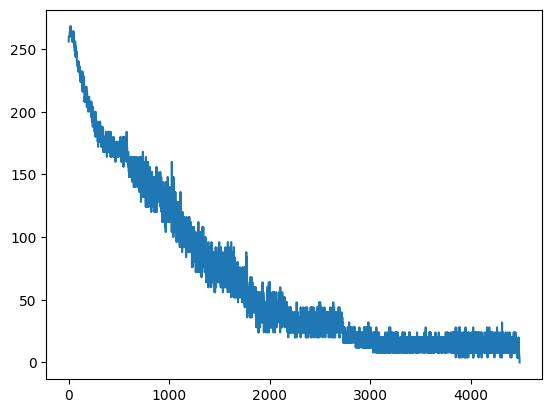

In [27]:
#vamos con entrenarla con func sign

#para la funcion de slaida, uso tanh

P = 26#num de letras que le voy a enseniar(filas del input)

N = 25#num de columnas del input(seria como las variables de entrada)

M = 5#las columnas del target(serian las variables de salida)

#generemos los w al azar

w = np.random.normal(0,0.1,(N+1,M))

#el ciclo, para el perceptron...

#hasta aca, son los pasos sucesivos, pra calcular el error, usemos estos en un ciclo
epoca = 0
error_sign = 10000
errores_sign = []

lr = 0.00001
while(error_sign > 0.001 and epoca < 10000):
    
    y = np.sign(np.dot(x_input_bias,w))
    
    dist = target_int - y
    
    delta_w = np.dot(x_input_bias.T,dist)
    
    w = w + delta_w*lr
    
    error_sign = np.sum(np.square(dist))
    
    errores_sign.append(error_sign)
    
    epoca+=1
    
    if(epoca%20==0):
    
        print(error_sign)

print(y)

#vale la pena graficar los errores
x_errores_sign = np.arange(0,len(errores_sign))

plt.plot(x_errores_sign , errores_sign)

40.0
12.0
24.0
12.0
4.0
[[-1. -1. -1. -1.  1.]
 [-1. -1. -1.  1. -1.]
 [-1. -1. -1.  1.  1.]
 [-1. -1.  1. -1. -1.]
 [-1. -1.  1. -1.  1.]
 [-1. -1.  1.  1. -1.]
 [-1. -1.  1.  1.  1.]
 [-1.  1. -1. -1. -1.]
 [-1.  1. -1. -1.  1.]
 [-1.  1. -1.  1. -1.]
 [-1.  1. -1.  1.  1.]
 [-1.  1.  1. -1. -1.]
 [-1.  1.  1. -1.  1.]
 [-1.  1.  1.  1. -1.]
 [-1.  1.  1.  1.  1.]
 [ 1. -1. -1. -1. -1.]
 [ 1. -1. -1. -1.  1.]
 [ 1. -1. -1.  1. -1.]
 [ 1. -1. -1.  1.  1.]
 [ 1. -1.  1. -1. -1.]
 [ 1. -1.  1. -1.  1.]
 [ 1. -1.  1.  1. -1.]
 [ 1. -1.  1.  1.  1.]
 [ 1.  1. -1. -1. -1.]
 [ 1.  1. -1. -1.  1.]
 [ 1.  1. -1.  1. -1.]]


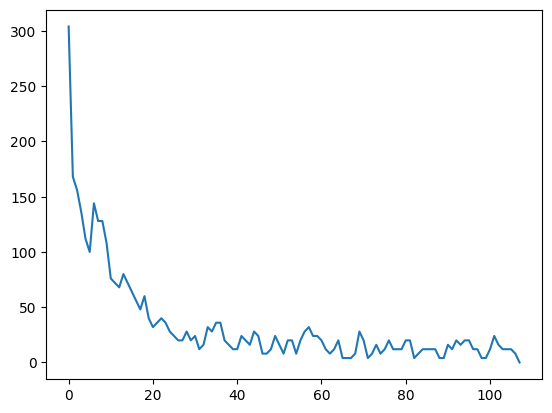

In [28]:
#vamos con entrenarla con func sign

#para la funcion de slaida, uso tanh

P = 26#num de letras que le voy a enseniar(filas del input)

N = 25#num de columnas del input(seria como las variables de entrada)

M = 5#las columnas del target(serian las variables de salida)

#generemos los w al azar

w = np.random.normal(0,0.1,(N+1,M))

#el ciclo, para el perceptron...

#hasta aca, son los pasos sucesivos, pra calcular el error, usemos estos en un ciclo
epoca = 0
error_sign = 10000
errores_sign = []

lr = 0.01
while(error_sign > 0.001 and epoca < 10000):
    
    y = np.sign(np.dot(x_input_bias,w))
    
    dist = target_int - y
    
    delta_w = np.dot(x_input_bias.T,dist)
    
    w = w + delta_w*lr
    
    error_sign = np.sum(np.square(dist))
    
    errores_sign.append(error_sign)
    
    epoca+=1
    
    if(epoca%20==0):
    
        print(error_sign)

print(y)

#vale la pena graficar los errores
x_errores_sign = np.arange(0,len(errores_sign))

plt.plot(x_errores_sign , errores_sign)

141.29239873770115
124.91195767582553
112.92425914136521
104.2322408597091
97.81739297100475
92.92741515775414
89.06017887691898
85.89326528496568
83.22033946019866
80.90728030777865
78.8647399495679
77.03151928623073
75.36451038017921
73.8325289046328
72.41245358179475
71.08675247898151
69.841859437268
68.66708320702742
67.55385802160879
66.49521793811886
65.48542098919206
64.51967567191126
63.593938670449596
62.70476303356973
61.84918266801418
61.024623359976985
60.22883343965684
59.45982917350901
58.71585132665382
57.99533028798126
57.29685782449773
56.61916401576097
55.961098271370886
55.32161359331292
54.699753437134795
54.0946406699817
53.50546823242495
52.93149119403988
52.37201995646299
51.82641440700523
51.29407886434535
50.774457687981005
50.26703144691231
49.77131356192943
49.286847350967165
48.81320341911163
48.349977344633984
47.89678762037406
47.45327381628422
47.019094934262995
46.59392793079408
46.17746638653648
45.7694193050328
45.369510025226575
44.97747523459763
44.5

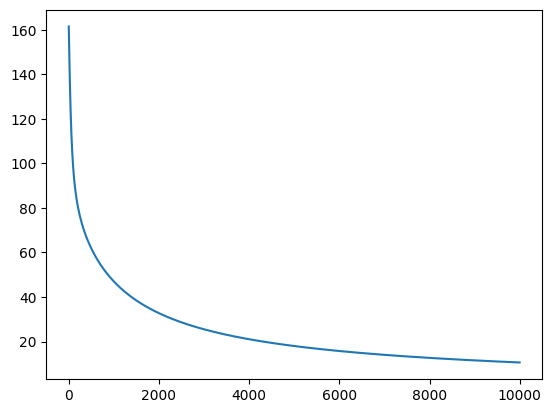

In [29]:
#####ahora con tanh

P = 26#num de letras que le voy a enseniar(filas del input)

N = 25#num de columnas del input(seria como las variables de entrada)

M = 5#las columnas del target(serian las variables de salida)

#generemos los w al azar

w = np.random.normal(0,0.1,(N+1,M))

#el ciclo, para el perceptron...

#hasta aca, son los pasos sucesivos, pra calcular el error, usemos estos en un ciclo
epoca = 0
error_tanh = 10000
errores_tanh = []

lr = 0.0001
while(error_tanh > 0.001 and epoca < 10000):
    
    y = np.tanh(np.dot(x_input_bias,w))
    
    dist = target_int - y
    
    delta_w = np.dot(x_input_bias.T,dist)
    
    w = w + delta_w*lr
    
    error_tanh = np.sum(np.square(dist))
    
    errores_tanh.append(error_tanh)
    
    epoca+=1
    
    if(epoca%20==0):
    
        print(error_tanh)

print(y)

#vale la pena graficar los errores
x_errores_tanh = np.arange(0,len(errores_tanh))

plt.plot(x_errores_tanh , errores_tanh)

33.46989772421072
21.382536362920703
15.918404834444468
12.758619875051847
10.671054504669488
9.173426848722407
8.038094181054394
7.14293466916773
6.416126958932954
5.812453194731376
5.301921557839022
4.863802112362537
4.483275798854107
4.14944495363102
3.8540986093758627
3.5909178467648117
3.3549485075116587
3.142242008286469
2.9496049560116857
2.774420971093478
2.614521503700719
2.468090557452747
2.3335933069835413
2.2097218344979876
2.0953533212109683
1.9895174308677317
1.89137056863078
1.8001753473443114
1.7152840444710054
1.636125151192954
1.5621923423923023
1.4930353604448456
1.4282524257982123
1.3674838760031027
1.3104068010810743
1.2567304930292946
1.2061925652457393
1.1585556268182025
1.113604419196842
1.071143340391224
1.03099429569192
0.9929948248975621
0.9569964647888223
0.9228633126268232
0.8904707621398826
0.8597043880858697
0.8304589592578093
0.8026375629082422
0.7761508261358467
0.750916221910229
0.726857449189451
0.7039038780752207
0.6819900522043683
0.6610552416342577

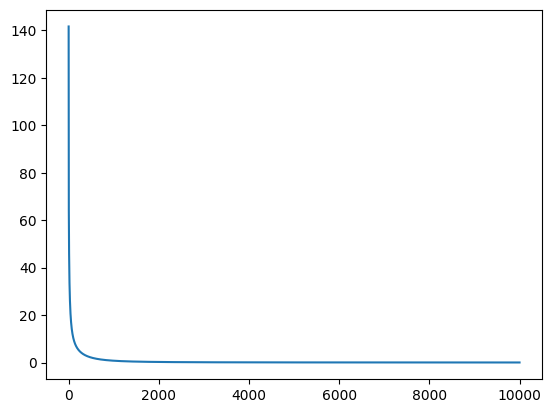

In [30]:
#####ahora con tanh

P = 26#num de letras que le voy a enseniar(filas del input)

N = 25#num de columnas del input(seria como las variables de entrada)

M = 5#las columnas del target(serian las variables de salida)

#generemos los w al azar

w = np.random.normal(0,0.1,(N+1,M))

#el ciclo, para el perceptron...

#hasta aca, son los pasos sucesivos, pra calcular el error, usemos estos en un ciclo
epoca = 0
error_tanh = 10000
errores_tanh = []

lr = 0.01
while(error_tanh > 0.001 and epoca < 10000):
    
    y = np.tanh(np.dot(x_input_bias,w))
    
    dist = target_int - y
    
    delta_w = np.dot(x_input_bias.T,dist)
    
    w = w + delta_w*lr
    
    error_tanh = np.sum(np.square(dist))
    
    errores_tanh.append(error_tanh)
    
    epoca+=1
    
    if(epoca%20==0):
    
        print(error_tanh)

print(y)

#vale la pena graficar los errores
x_errores_tanh = np.arange(0,len(errores_tanh))

plt.plot(x_errores_tanh , errores_tanh)

164.39937721634226
164.2392113925912
164.07928477361838
163.91959833748288
163.76015304981075
163.60094986376413
163.4419897200126
163.28327354670694
163.12480225945512
162.96657676130076
162.80859794270367
162.65086668152298
162.4933838430023
162.33615027975725
162.17916683176492
162.02243432635618
161.86595357820957
161.7097253893475
161.55375054913483
161.39802983427938
161.24256400883445
161.08735382420383
160.93240001914816
160.77770331979417
160.6232644396453
160.4690840795944
160.31516292793881
160.16150166039677
160.00810094012598
159.8549614177444
159.70208373135245
159.54946850655688
159.39711635649732
159.24502788187334
159.09320367097456
158.9416442997114
158.7903503316482
158.63932231803778
158.48856079785736
158.3380662978467
158.18783933254724
158.03788040434324
157.88819000350372
157.7387686082271
157.5896166846859
157.44073468707396
157.29212305765452
157.14378222680978
156.99571261309188
156.8479146232751
156.70038865240943
156.55313508387525
156.40615428943948
156.25

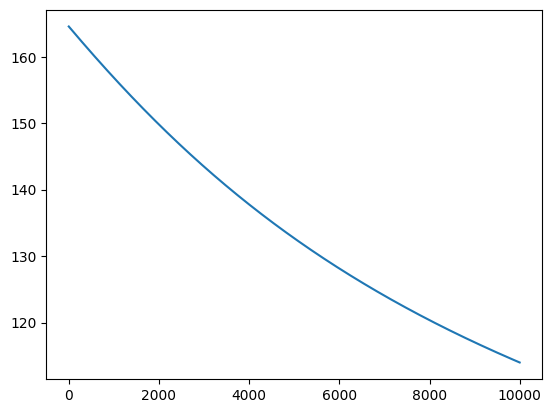

In [31]:
#####ahora con tanh

P = 26#num de letras que le voy a enseniar(filas del input)

N = 25#num de columnas del input(seria como las variables de entrada)

M = 5#las columnas del target(serian las variables de salida)

#generemos los w al azar

w = np.random.normal(0,0.1,(N+1,M))

#el ciclo, para el perceptron...

#hasta aca, son los pasos sucesivos, pra calcular el error, usemos estos en un ciclo
epoca = 0
error_tanh = 10000
errores_tanh = []

lr = 0.000001
while(error_tanh > 0.001 and epoca < 10000):
    
    y = np.tanh(np.dot(x_input_bias,w))
    
    dist = target_int - y
    
    delta_w = np.dot(x_input_bias.T,dist)
    
    w = w + delta_w*lr
    
    error_tanh = np.sum(np.square(dist))
    
    errores_tanh.append(error_tanh)
    
    epoca+=1
    
    if(epoca%20==0):
    
        print(error_tanh)

print(y)

#vale la pena graficar los errores
x_errores_tanh = np.arange(0,len(errores_tanh))

plt.plot(x_errores_tanh , errores_tanh)